In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
starrings = pd.read_csv('./data/starrings_full.csv')

In [3]:
starrings.head()

,owner,repo,starred_at,user.login,user.site_admin,user.type,user.id
0,npm,marky-markdown,2014-12-19T22:20:50Z,ceejbot,False,User,757502
1,npm,marky-markdown,2015-01-06T09:12:49Z,sorrycc,False,User,35128
2,npm,marky-markdown,2015-01-14T18:56:14Z,bcoe,False,User,194609
3,npm,marky-markdown,2015-01-26T21:30:28Z,pose,False,User,419703
4,npm,marky-markdown,2015-01-29T16:43:08Z,mattallty,False,User,178616


In [4]:
repo_list = pd.read_csv('./data/repos-with-homepage.csv')

In [6]:
starrings['full_name'] = starrings['owner'] + '/' + starrings['repo']

In [7]:
repo_list['full_name2'] = repo_list['org_id'] + '/' + repo_list['name']

In [9]:
len(set(repo_list.full_name2.tolist()) - set(starrings['full_name'].unique().tolist()))

0

### {repo: [user.id1, user.id2, ...]}

In [13]:
repos_users_map = {} 

In [14]:
repos = starrings['full_name'].unique().tolist()

In [15]:
len(repos)

709

In [16]:
counter = 0
for repo in repos:
    if counter % 100 == 0:
        print 'already done with {}'.format(counter)
    repos_users_map[repo] = starrings[starrings['full_name'] == repo]['user.id'].unique().tolist()
    counter += 1

already done with 0
already done with 100
already done with 200
already done with 300
already done with 400
already done with 500
already done with 600
already done with 700


### {'repo1_repo2' : [repo1, repo2, [common_users], is_connected]}

In [17]:
repo_repo_users = {}

In [18]:
for k1, v1 in repos_users_map.iteritems():
    for k2, v2 in repos_users_map.iteritems():
        if k1 == k2:
            continue
        key = '_'.join(sorted([k1, k2]))
        if key in repo_repo_users.keys():
            continue
        common_users = list(set(v1) & set(v2))
        is_connected = len(common_users) != 0
        repo_repo_users[key] = [k1, k2, common_users, is_connected]

In [19]:
len(repo_repo_users.keys()) # total 247456, all match should be 709*708/2=250986

250986

### [repo1, repo2, [common_users], is_connected]

In [20]:
import csv
with open("./data/repo_repo_users.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerows(repo_repo_users.values())

In [21]:
repo_repo_users.values()[0:2]

[['linkedin/inject',
  'airbnb/enzyme',
  [1283200,
   19714,
   116996,
   182661,
   149897,
   1390475,
   137612,
   2882,
   81552,
   4756,
   446613,
   1298185,
   5073946,
   2723099,
   1280922,
   105758,
   13491333,
   1738400,
   261027,
   1195074,
   1214630,
   2245162,
   45868,
   225712,
   5654065,
   66100,
   515714,
   5499703,
   627410,
   1160522,
   130494,
   961856,
   138050,
   3436611,
   506438,
   4579914,
   1337046,
   1128312,
   464978,
   870995,
   194260,
   615381,
   502358,
   1458008,
   6399322,
   276955,
   124380,
   6502877,
   152287,
   290272,
   79451,
   652388,
   286950,
   22249,
   396013,
   740978,
   667603,
   127349,
   28534,
   352105,
   2296,
   319609,
   63402],
  True],
 ['cloudera/Impala',
  'microsoft/TypeScript',
  [650753,
   7543300,
   863754,
   634379,
   128525,
   5729965,
   398655,
   4901397,
   603158,
   103447,
   4968473,
   554159,
   565790,
   11814,
   1055787,
   1490484,
   8683573,
   204139

### simple count the common users

In [3]:
repo_repo_users = pd.read_csv('./data/repo_repo_users.csv', header=None)

In [4]:
repo_repo_users.columns = ['Source', 'Target', 'common_users', 'is_connected']

In [5]:
repo_repo_users['Weight'] = repo_repo_users['common_users'].apply(lambda x : len(x))

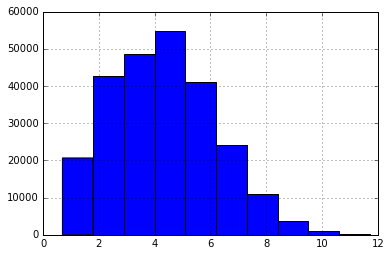

In [8]:
np.log(repo_repo_users['Weight']).hist()

In [9]:
repo_repo_users['Weight'] = repo_repo_users['Weight'].apply(lambda x : np.log(x))

In [10]:
repo_repo_users.head()

,Source,Target,common_users,is_connected,Weight
0,oozie,PTVS,"[3054232, 5772169, 1673081, 5877145]",True,3.583519
1,mysql-server,kobold,"[2882, 48936, 54254, 10000, 227057, 2041398]",True,3.784190
2,flux,rake,"[5161474, 6025220, 322054, 4685837, 9990676, 5...",True,7.080026
3,material-design-icons,WebFundamentals,"[8880128, 393220, 1572872, 1097738, 5472278, 5...",True,9.683215
4,jstorm,cdk,"[650753, 3584226, 2773827, 2123078, 693320, 54...",True,4.634729


In [11]:
repo_repo_users[['Source', 'Target', 'Weight']].to_csv('./data/repo_repo_counts.csv', index=False)